In [43]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
url = "https://www.premierleague.com/tables"

In [3]:
r = requests.get(url)
html = r.text

In [4]:
soup = BeautifulSoup(html)
soup.title

<title>Premier League Table, Form Guide &amp; Season Archives</title>

In [5]:
tbody = soup.select_one('tbody')
rows = tbody.select("tr[data-compseason]")

columns = ["Played","Won","Drawn","Lost","GF","GA","GD","Points"]
table = []

for row in rows :
  team = {}
  team["Name"] = row.select_one("td.team span.long").get_text()
  siblings = row.select("td.team ~ td")

  for i, col in enumerate(columns) :
    team[col] = siblings[i].get_text().replace("\n", "").strip()

  table.append(team)

In [6]:
premier_league = pd.DataFrame(table)
premier_league

,Name,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Manchester City,29,22,4,3,68,18,+50,70
1,Liverpool,29,21,6,2,75,20,+55,69
2,Chelsea,28,17,8,3,57,19,+38,59
3,Arsenal,28,17,3,8,44,31,+13,54
4,Tottenham Hotspur,29,16,3,10,47,36,+11,51
5,Manchester United,29,14,8,7,48,40,+8,50
6,West Ham United,30,14,6,10,49,39,+10,48
7,Wolverhampton Wanderers,30,14,4,12,31,26,+5,46
8,Aston Villa,29,11,3,15,41,40,+1,36
9,Leicester City,27,10,6,11,42,46,-4,36


In [10]:
premier_league.to_csv("premierleague.csv",index=False)

In [11]:
df = pd.read_csv("premierleague.csv")
df.head()

,Name,Played,Won,Drawn,Lost,GF,GA,GD,Points
0,Manchester City,29,22,4,3,68,18,50,70
1,Liverpool,29,21,6,2,75,20,55,69
2,Chelsea,28,17,8,3,57,19,38,59
3,Arsenal,28,17,3,8,44,31,13,54
4,Tottenham Hotspur,29,16,3,10,47,36,11,51


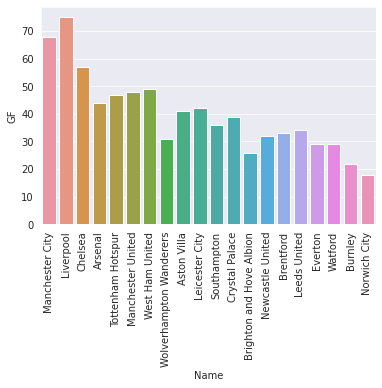

In [53]:
sns.set_style("darkgrid")
sns.barplot(data=df,x="Name",y="GF")
plt.xticks(rotation=90)
plt.show()

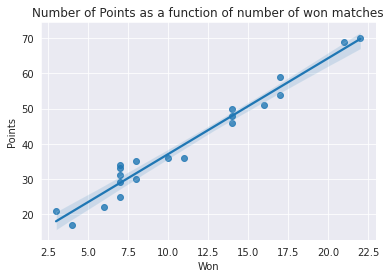

In [29]:
g = sns.regplot(data=df,x="Won",y="Points")
g.set(title="Number of Points as a function of number of won matches")
plt.show()

In [41]:
X = df[["Won","Drawn","Lost"]].values
y = df["Points"].values

reg = LinearRegression()
reg.fit(X,y)
reg.coef_

array([3.00000000e+00, 1.00000000e+00, 1.22124533e-15])

In [42]:
reg.score(X, y)

1.0

In [47]:
# A team with 3 wins , 5 draws and 6 losts
reg.predict(np.array([[3,5,6]]))

array([14.])

In [48]:
3 * reg.coef_[0] + 5 * reg.coef_[1]

14.000000000000004

# Conclusion : 
   We can see that a win counts for 3 points and a draw counts for 1 point and a lost is approximatly 0 points